In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage

c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#导入数据
train_data=h5py.File('datasets/train_catvnoncat.h5','r')
test_data=h5py.File('datasets/test_catvnoncat.h5','r')
X_train=np.array(train_data['train_set_x'][:])
Y_train=np.array(train_data['train_set_y'][:])
X_test=np.array(test_data['test_set_x'][:])
Y_test=np.array(test_data['test_set_y'][:])
classes=np.array(test_data['list_classes'][:])
Y_train.shape

(209,)

In [3]:
#转换标签格式
Y_train=Y_train.reshape((1,Y_train.shape[0]))
Y_test=Y_test.reshape((1,Y_test.shape[0]))
Y_train.shape
Y_test.shape

(1, 50)

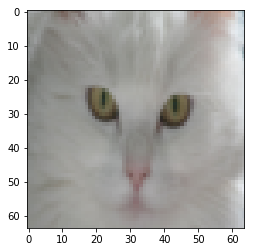

In [4]:
#查看tux
plt.imshow(X_train[50])

In [5]:
#将图像格式转化
X_train=X_train.reshape(-1,X_train.shape[0])/255
X_train.shape

(12288, 209)

In [6]:
X_test=X_test.reshape(-1,X_test.shape[0])/255
X_test.shape

(12288, 50)

定义模块

In [7]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [8]:
def initialize_with_zeros(dims):
    w=np.zeros((dims,1))
    b=0
    return w,b

In [9]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost=np.sum(np.dot(np.log(A),Y.T)+np.dot(np.log(1-A),1-Y.T))/-m
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    grads={'dw':dw,
           'db':db}
    return grads,cost

In [10]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%100==0:
            costs.append(cost)
            
    params={'w':w,
           'b':b}
    
    grads={'dw':dw,
           'db':db}


    return grads,params,costs
        
    

In [11]:
def predict(w,b,x):
    Y_pre=np.zeros((1,x.shape[1]))
    Y_pre=sigmoid(np.dot(w.T,x)+b)
    for i in range(x.shape[1]):
        if Y_pre[0,1]<=0.5:
            Y_pre[0,i]=0
        else:
            Y_pre[0,i]=1
    return Y_pre

In [12]:
def model (X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.005,print_cost=False):
    w,b=initialize_with_zeros(X_train.shape[0])
   
    grads,params,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w=params['w']
    b=params['b']
    Y_train_pre=predict(w,b,X_train)
    Y_test_pre=predict(w,b,X_test)
    print('accuracy of train : {} %'.format(100-np.mean(np.abs(Y_train_pre-Y_train))*100))
    print('accuracy of test : {} %'.format(100-np.mean(np.abs(Y_test_pre-Y_test))*100))
    d = {"costs": costs,
         "Y_prediction_test": Y_train_pre, 
         "Y_prediction_train" : Y_test_pre, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [13]:
d=model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.005)

accuracy of train : 65.55023923444976 %
accuracy of test : 34.0 %


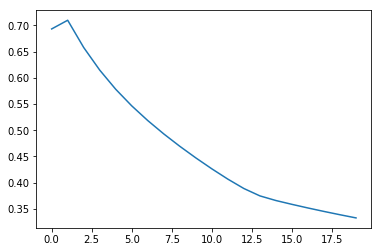

In [14]:
costs=d['costs']
plt.plot(costs)